# 搭建神经网络

In [22]:
import torch
from matplotlib import pyplot as plt
import torch.nn.functional as F

## 实现简单回归

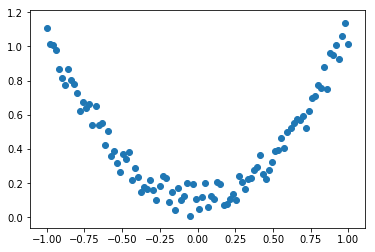

In [23]:
# 产生并画出模拟数据
x = torch.unsqueeze(torch.linspace(-1, 1, 100),1)
y = x.pow(2) + 0.2*torch.rand(x.size())

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [24]:
# 构建神经网络
class Net(torch.nn.Module):
    # 定义每层的属性
    def __init__(self, n_feature, n_hidden, n_out):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_out)
    # 前馈获得预测
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

net = Net(1, 10, 1)

print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


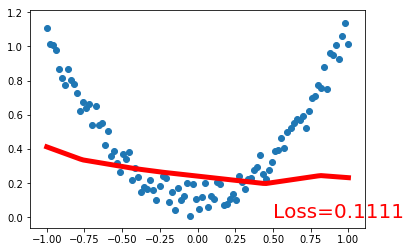

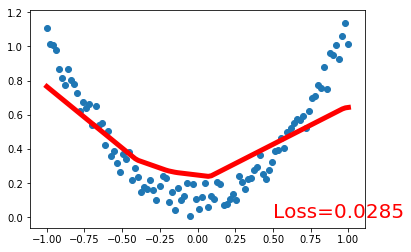

In [25]:
# 优化模型
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()

plt.ion()
plt.show()

# 训练模型
for t in range(100):
    pred = net(x)
    
    loss = loss_func(pred, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # 打印输出
    if t % 50 == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), pred.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

## 实现简单分类

In [49]:
n_data = torch.ones(100, 2)
x0 = torch.normal(2*n_data, 1)
y0 = torch.zeros(100)
x1 = torch.normal(-2*n_data, 1)
y1 = torch.ones(100)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)
y = torch.cat((y0, y1), ).type(torch.LongTensor)
# print(x.size(), x)
# print(y.size(), y)

torch.Size([200]) tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1])


In [50]:
class Net(torch.nn.Module):     # 继承 torch 的 Module
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()     # 继承 __init__ 功能
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # 隐藏层线性输出
        self.out = torch.nn.Linear(n_hidden, n_output)       # 输出层线性输出

    def forward(self, x):
        # 正向传播输入值, 神经网络分析出输出值
        x = F.relu(self.hidden(x))      # 激励函数(隐藏层的线性值)
        x = self.out(x)                 # 输出值, 但是这个不是预测值, 预测值还需要再另外计算
        return x

net = Net(n_feature=2, n_hidden=10, n_output=2) # 几个类别就几个 output

print(net)  # net 的结构

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


In [53]:
# optimizer 是训练的工具
optimizer = torch.optim.SGD(net.parameters(), lr=0.02)  # 传入 net 的所有参数, 学习率
# 算误差的时候, 注意真实值!不是! one-hot 形式的, 而是1D Tensor, (batch,)
# 但是预测值是2D tensor (batch, n_classes)
loss_func = torch.nn.CrossEntropyLoss()

for t in range(100):
    out = net(x)     # 喂给 net 训练数据 x, 输出分析值

    loss = loss_func(out, y)     # 计算两者的误差

    optimizer.zero_grad()   # 清空上一步的残余更新参数值
    loss.backward()         # 误差反向传播, 计算参数更新值
    optimizer.step()        # 将参数更新值施加到 net 的 parameters 上

In [65]:
def intersect(nums1, nums2):
        """
        :type nums1: List[int]
        :type nums2: List[int]
        :rtype: List[int]
        """
        nums1.sort()
        nums2.sort()
        i, j = 0, 0
        insections = []
        while i < len(nums1) and j < len(nums2):
            if nums1[i] > nums2[j]:
                j += 1
            elif nums1[i] < nums2[j]:
                i += 1
            else:
                insections.append(nums1[i])
                i += 1
                j += 1
        return insections
nums1 = [4,9,5]
nums2 = [9,4,9,8,4]
print(intersect(nums1, nums2))

[4, 9]


In [71]:
def plusOne(digits):
        """
        :type digits: List[int]
        :rtype: List[int]
        """
        for _ in range(len(digits)):
            _ = len(digits) - 1 - _
            print(_, digits[_])
            new_elem = digits[_] + 1
            if new_elem == 10:
                digits[_] = 0
                flag = True
            else:
                digits[_] = new_elem
                flag = False
                break
        if flag == True:
            digits.insert(0, 1)
        return digits
print(plusOne([9, 9, 9, 9]))

3 9
2 9
1 9
0 9
True
[1, 0, 0, 0, 0]


In [79]:
def moveZeroes(nums):
        """
        :type nums: List[int]
        :rtype: void Do not return anything, modify nums in-place instead.
        """
        locs = []
        start_index = 0
        for _ in range(len(nums)):
            if nums[_] == 0:
                locs.append(-1)
            else:
                locs.append(start_index)
                start_index += 1
        for _ in range(len(nums)):
            if locs[_] != -1 and locs[_] != _:
                nums[locs[_]] = nums[_]
                nums[_] = 0
nums = [0, 1, 2, 3, 0]
moveZeroes(nums)
print(nums)

[1, 2, 3, 0, 0]
